# Linear Regression from Scratch - House Price Prediction

In [2]:
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("housing.csv") # creat data fram for thr data

In [4]:
data.head(10) # Display first 10 element. 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
data.columns.tolist() # Display the list of columns in the data frame. 

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [6]:
data.dtypes # Display the data types. 

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [7]:
data.columns = ['crime_rate', 'residential_zone', 'industrial_proportion', 'charles_river', 'nitric_oxide', 'avg_rooms', 'age_of_home', 'distance_to_employment', 'highway_accessibility', 'tax_rate', 'pupil_teacher_ratio', 'proportion_black', 'lower_status_population', 'median_value']
data.head(10) # Rename columns and display the first 10 elements. 

,crime_rate,residential_zone,industrial_proportion,charles_river,nitric_oxide,avg_rooms,age_of_home,distance_to_employment,highway_accessibility,tax_rate,pupil_teacher_ratio,proportion_black,lower_status_population,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [8]:
 # Divide the data into features and target. 
features = [ i for i in data.columns.tolist() if (i !='median_value')]
print(f"features are : {features}")
target = 'median_value'
print(f"Target is : {target}")

features are : ['crime_rate', 'residential_zone', 'industrial_proportion', 'charles_river', 'nitric_oxide', 'avg_rooms', 'age_of_home', 'distance_to_employment', 'highway_accessibility', 'tax_rate', 'pupil_teacher_ratio', 'proportion_black', 'lower_status_population']
Target is : median_value


In [9]:
data = data.dropna() # remove Nan values from rows and return new dataframe. 
# to To modify the DataFrame without replacing it we should do data = data.dropna(inplace=True)

In [10]:
X = data[features].values # convert the dataframe to an array and assgin it to X
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [11]:
y = data[target].values # Convert the column 'target' to an array of 1D vector ex [10,20,30]
y = y.reshape(-1,1)  #reshape it to 2D vectort because the model is Expecting that. so y = [[10], [20], [30]] 

In [12]:
# Standardize the data We compute the mean for each column. And the standard deviation for each column.  
# The reason of this is to bring the data to the same scale. 
X = (X - X.mean(axis=0)) / X.std(axis=0) 
print(X)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [13]:
# We do the same thing to the target.  
y = (y - y.mean(axis=0)) / y.std(axis=0)
print(y[:5])  # Display the first 5 elements. 

[[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]
 [ 1.48750288]]


In [14]:
# Split data to train and test. 
idx = int(0.8 * len(X))
# The first 90% will be for train, the remaining 10% for test. 
X_train, X_test = X[:idx], X[idx:] 
# The same thing for y 
y_train, y_test = y[:idx], y[idx:] 

In [15]:
# Check if GPU is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [16]:
# conver Train and test to float 32 tensor and move it to the device. 
X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)

y_train = torch.FloatTensor(y_train).to(device)
y_test = torch.FloatTensor(y_test).to(device)

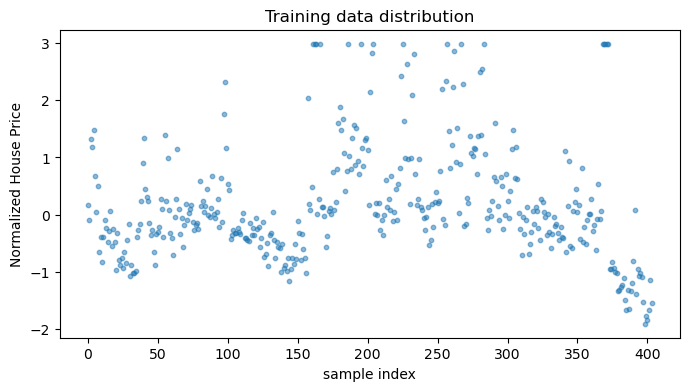

In [17]:
# diplay A plot of the training data distribution. 
plt.figure(figsize=(8,4))
plt.scatter(range(len(y_train)), y_train.cpu().numpy(), alpha=0.5, s=10)
plt.xlabel('sample index')
plt.ylabel('Normalized House Price')
plt.title('Training data distribution')
plt.show()

In [18]:
# Create or initialize the weight tensor that has the same size as the features. 
# Random initialization with standard deviation of 1 and mean of 0. 
# And scale the initialized values to small numbers. 
# Which will help the gradient descent to converge better. 
W = torch.randn(X_train.shape[1], 1, device=device) * 0.01
print(W[:5])


tensor([[ 0.0087],
        [ 0.0033],
        [-0.0066],
        [-0.0030],
        [ 0.0051]])


In [19]:
# tracking the values of W during backpropagation and update it. 
W.requires_grad = True


In [20]:
b = torch.zeros(1, device=device) # Initialize the bias, which is one single value, in as a tensor. 
print(b)
b.requires_grad = True # Compute gradient and update the value for the b as also. 

tensor([0.])


In [21]:
# Initialize the hyperparameters. 
lr = 0.1
epochs = 2000

Epoch 200/epochs, loss: 0.2700
Epoch 400/epochs, loss: 0.2698
Epoch 600/epochs, loss: 0.2698
Epoch 800/epochs, loss: 0.2698
Epoch 1000/epochs, loss: 0.2698
Epoch 1200/epochs, loss: 0.2698
Epoch 1400/epochs, loss: 0.2698
Epoch 1600/epochs, loss: 0.2698
Epoch 1800/epochs, loss: 0.2698
Epoch 2000/epochs, loss: 0.2698


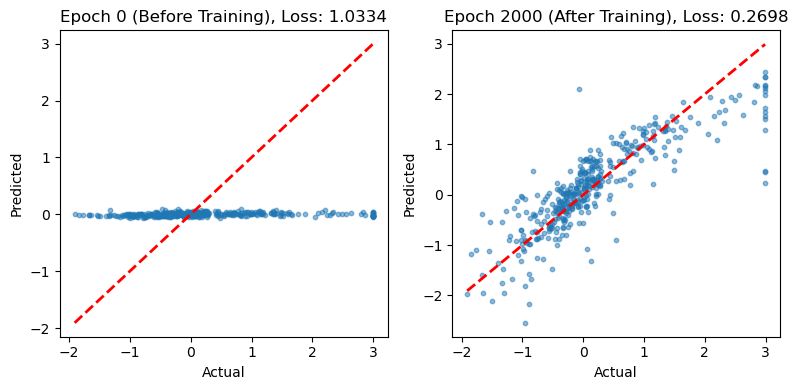

In [22]:
# Implement the training loop. 
plt.figure(figsize=(8,4))
# Compute predictions before the training. 
y_pred = X_train @ W + b # @ is for Matrix multiplication or dot product. 
# Compute the laws Main Square Error  before training.  
loss = ((y_pred - y_train)**2).mean()
plt.subplot(1,2,1) # We want to have two plots with one row (first 1). This plot number is one. (seconde 1)
y_pred_plot = (X_train @ W + b).cpu().detach().numpy()
# s mean the size of the point 10 is small,  and alpha mean the level of transparency 
# In case there are two points that overlap. 
plt.scatter(y_train.cpu().numpy(), y_pred_plot, alpha=0.5, s=10)
plt.plot([y_train.min().item(), y_train.max().item()], [y_train.min().item(), y_train.max().item()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Epoch 0 (Before Training), Loss: {loss.item():.4f}')


# Start implementing the training loop. 
for epoch in range(epochs):
    # Compute the prediction values. 
    y_pred = X_train @ W + b
    # Compute the loss. MSE 
    loss = ((y_pred - y_train)**2).mean()
    # compute the gradient 
    loss.backward()

    # Inside this block, don’t track operations for gradient computation.
    # because it is not part of the forward/backward pass.
    with torch.no_grad():
        #This code updates the weights W and bias b using gradient descent by subtracting the gradient (scaled by the learning rate) while temporarily turning off gradient tracking.
        W -= lr * W.grad
        b -= lr * b.grad
        # Reset the values to zero for the next backward pass. 
        W.grad.zero_()
        b.grad.zero_()

        # Print the loss every 200 epochs. 
        if(epoch + 1) % 200 == 0:
            print(f"Epoch {epoch+1}/epochs, loss: {loss.item():.4f}")
# This is the second plot in the same row of two plots.             
plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2)
y_pred_plot = (X_train @ W + b).cpu().detach().numpy()
plt.scatter(y_train.cpu().numpy(), y_pred_plot, alpha=0.5, s=10)
plt.plot([y_train.min().item(), y_train.max().item()], [y_train.min().item(), y_train.max().item()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Epoch {epochs} (After Training), Loss: {loss.item():.4f}')
plt.tight_layout()
plt.show()


In [23]:
# Compute the scores for the test and train. 
# 1 : MSE stands for Mean Squared Error 
# 2 : R² (coefficient of determination) which measures how well your model’s predictions match the true values
with torch.no_grad():
    y_train_pred = X_train @ W + b
    y_test_pred = X_test @ W + b
    train_mse = ((y_train_pred - y_train)**2).mean().item()
    test_mse = ((y_test_pred - y_test)**2).mean().item()
    train_r2 = 1 - ((y_train - y_train_pred) ** 2).sum() / ((y_train - y_train.mean()) ** 2).sum()
    test_r2 = 1 - ((y_test - y_test_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

Train MSE: 0.2698, Test MSE: 0.3885
Train R²: 0.7338, Test R²: -0.2199


In [24]:
# We conclude that the model suffers from overfitting, which means it memorizes the training data and can't generalize very well on the training data. 
# For the mean square error, a smaller score for the train and one bit larger for the test indicate an overfitting. 
# High score for training for R2 And negative, small score for this is a classic sign of overfitting. 

In [25]:
# Predicting the price for new_house. 

"""
The features in order are:

crime_rate: 0.5
residential_zone: 10.0
industrial_proportion: 5.0
charles_river: 0
nitric_oxide: 0.4
avg_rooms: 6.5
age_of_home: 50.0
distance_to_employment: 3.5
highway_accessibility: 4
tax_rate: 300
pupil_teacher_ratio: 16.0
proportion_black: 390.0
lower_status_population: 8.0

"""
new_house = np.array([[0.5, 10.0, 5.0, 0, 0.4, 6.5, 50.0, 3.5, 4, 300, 16.0, 390.0, 8.0]])
X_mean = data[features].values.mean(axis=0)
X_std = data[features].values.std(axis=0)
y_mean = data[target].values.mean()
y_std = data[target].values.std()
new_house_normalized = (new_house - X_mean) / X_std
new_house_tensor = torch.FloatTensor(new_house_normalized).to(device)
with torch.no_grad():
    prediction_normalized = (new_house_tensor @ W + b).item()
    prediction_price = prediction_normalized * y_std + y_mean
    print(f"Predicted normalized value: {prediction_normalized:.4f}")
    print(f"Predicted house price: ${prediction_price * 1000:.2f}")

Predicted normalized value: 0.8580
Predicted house price: $30415.81
